Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64
State
 NSW    441.714286
 NT     109.079365
 QLD    177.888889
 SA     339.412698
 TAS    110.222222
 VIC    635.968254
 WA     106.365079
Name: Sales, dtype: float64


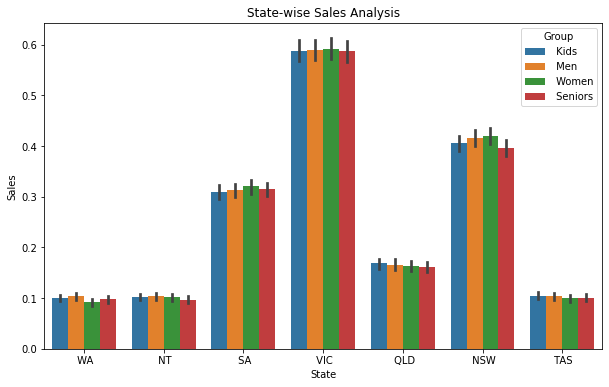

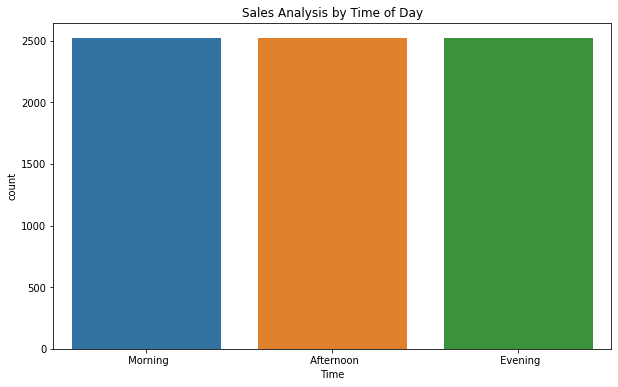

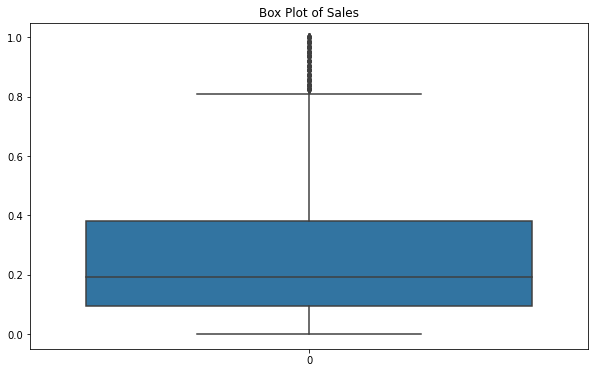

Mean Sales: 0.25405433778449654
Median Sales: 0.1904761904761905
Mode Sales: 0.1111111111111111
Standard Deviation of Sales: 0.20478417107280047
Highest Sales State:  VIC
Lowest Sales State:  WA


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv("AusApparalSales4thQrt2020.csv")

# Data Wrangling - Check for missing data
print(df.isna().sum())  # Identifying missing values

# Handle missing data (filling missing values with the mean of the respective column, if any)
df['Sales'] = df['Sales'].fillna(df['Sales'].mean())

# Normalization using MinMaxScaler for 'Sales' and 'Unit'
scaler = MinMaxScaler()
df[['Sales', 'Unit']] = scaler.fit_transform(df[['Sales', 'Unit']])

# Converting 'Date' column to datetime for future resampling
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')

# GroupBy to sum up sales by state
state_sales = df.groupby('State')['Sales'].sum()
print(state_sales)

# Descriptive statistics for the 'Sales' column
mean_sales = df['Sales'].mean()  # Mean
median_sales = df['Sales'].median()  # Median
mode_sales = df['Sales'].mode()[0]  # Mode
std_sales = df['Sales'].std()  # Standard Deviation

# Identify the state with the highest and lowest sales
highest_sales_state = df.groupby('State')['Sales'].sum().idxmax()  # State with highest sales
lowest_sales_state = df.groupby('State')['Sales'].sum().idxmin()  # State with lowest sales

# Generate weekly and monthly sales reports
# weekly_report = df.resample('W', on='Date').sum()  # Weekly sales report
# monthly_report = df.resample('M', on='Date').sum()  # Monthly sales report

# Visualization - State-wise sales analysis using a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='State', y='Sales', hue='Group', data=df)
plt.title("State-wise Sales Analysis")
plt.show()

# Visualization - Time-of-day sales analysis (Morning, Afternoon, Evening)
plt.figure(figsize=(10,6))
sns.countplot(x='Time', data=df)
plt.title("Sales Analysis by Time of Day")
plt.show()

# Box plot for descriptive statistics of sales
plt.figure(figsize=(10,6))
sns.boxplot(df['Sales'])
plt.title("Box Plot of Sales")
plt.show()

# Display statistics
print(f"Mean Sales: {mean_sales}")
print(f"Median Sales: {median_sales}")
print(f"Mode Sales: {mode_sales}")
print(f"Standard Deviation of Sales: {std_sales}")
print(f"Highest Sales State: {highest_sales_state}")
print(f"Lowest Sales State: {lowest_sales_state}")
